In [201]:
print("Investment Returns Calculation")

Investment Returns Calculation


Reference document - [Returns and Log Returns](https://gregorygundersen.com/blog/2022/02/06/log-returns/)

In [202]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta

today = date.today().replace(month=date.today().month)
start_date = today - relativedelta(months=12)


print("Period of calculation,",today, "-", start_date)

Period of calculation, 2024-01-13 - 2023-01-13


In [203]:
stock_ticker='BTC-USD'

df = yf.download(stock_ticker,
                 start=start_date,
                 end=today,
                 progress=False)
df.head()

# make Date as a part of the table
df.reset_index(inplace=True)


Plot the adjusted close


Text(0.5, 1.0, 'The Stock Price of BTC-USD')

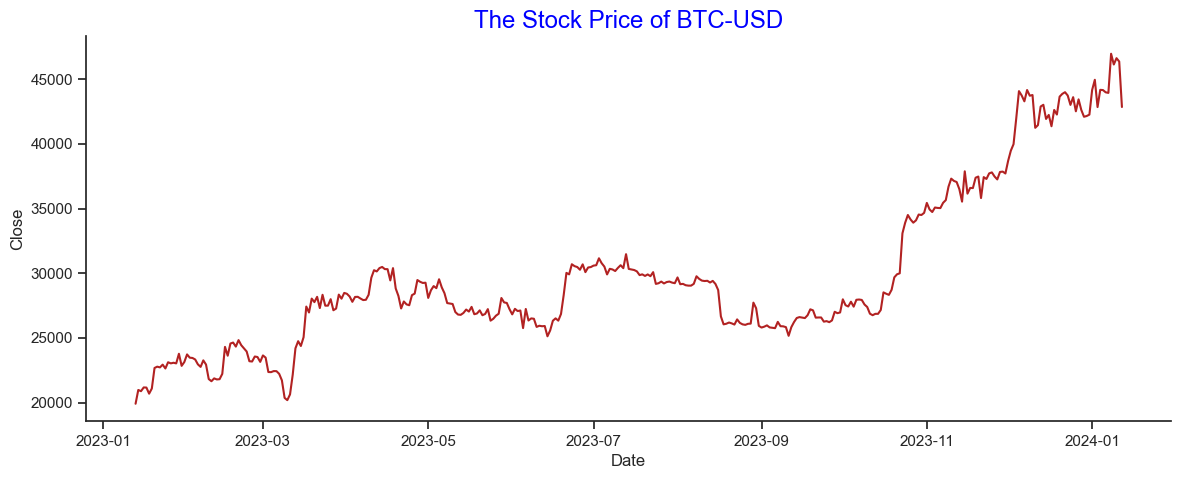

In [204]:
print("Plot the adjusted close")
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()


plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="Date",y='Close',color='firebrick')
sns.despine()
plt.title(f"The Stock Price of {stock_ticker}",size='x-large',color='blue')


#### Simple returns formula

$R_{t} = \left (P_{t} - P_{t-1}\right )/P_{t-1} = P_{t}/P_{t-1} -1$

/Users/abhisawa/git/pyworkspace/.venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


(-0.3, 0.3)

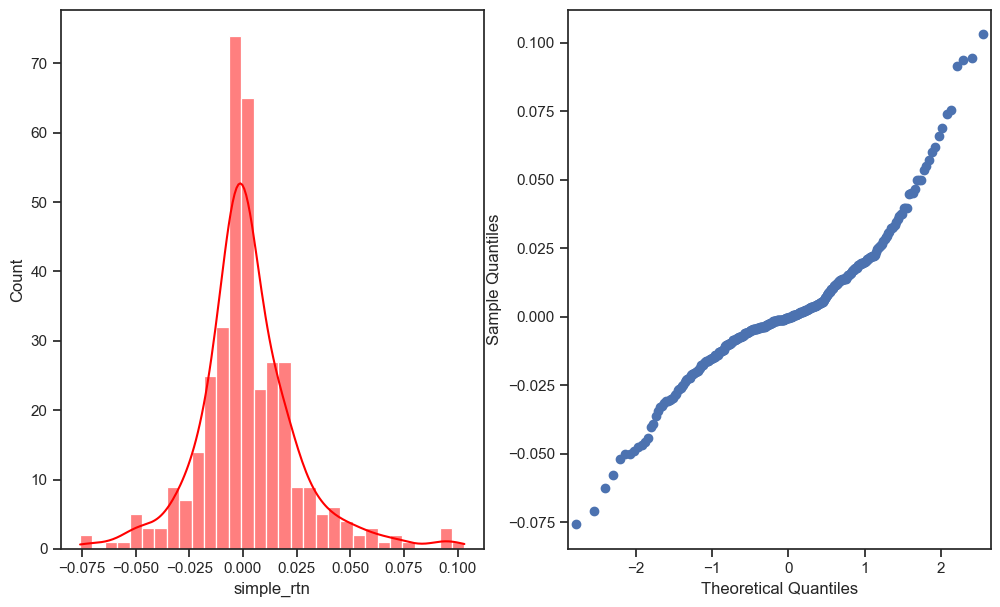

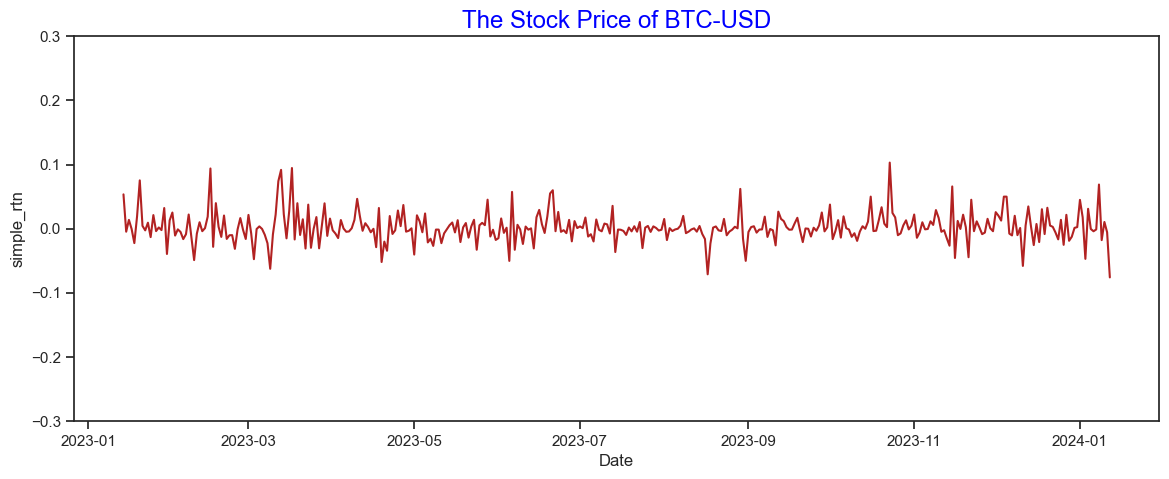

In [205]:
df["simple_rtn"] = df["Adj Close"].pct_change()



import statsmodels.graphics.gofplots as sm 
fig, ax = plt.subplots(1, 2, figsize=(12, 7)) 
sns.histplot(df["simple_rtn"],kde=True, color ='red',ax=ax[0])
sm.ProbPlot(df["simple_rtn"]).qqplot(line='s',color='red',ax=ax[1])


# plot work
plt.figure(figsize=(14,5))
sns.set_style("ticks")
#p = sns.lineplot(data=df,x="Date",y='simple_rtn',color='firebrick')
sns.despine()
plt.title(f"The Stock Price of {stock_ticker}",size='x-large',color='blue')

p = sns.lineplot(data=df,x="Date",y='simple_rtn',color='firebrick')
p.axes.set_ylim(-0.30,0.30)




#### Log returns formula

$r_{t} = log\left( P_{t}/P_{t-1}\right ) = log(P_{t}) - log(P_{t-1})$

/Users/abhisawa/git/pyworkspace/.venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


(-0.3, 0.3)

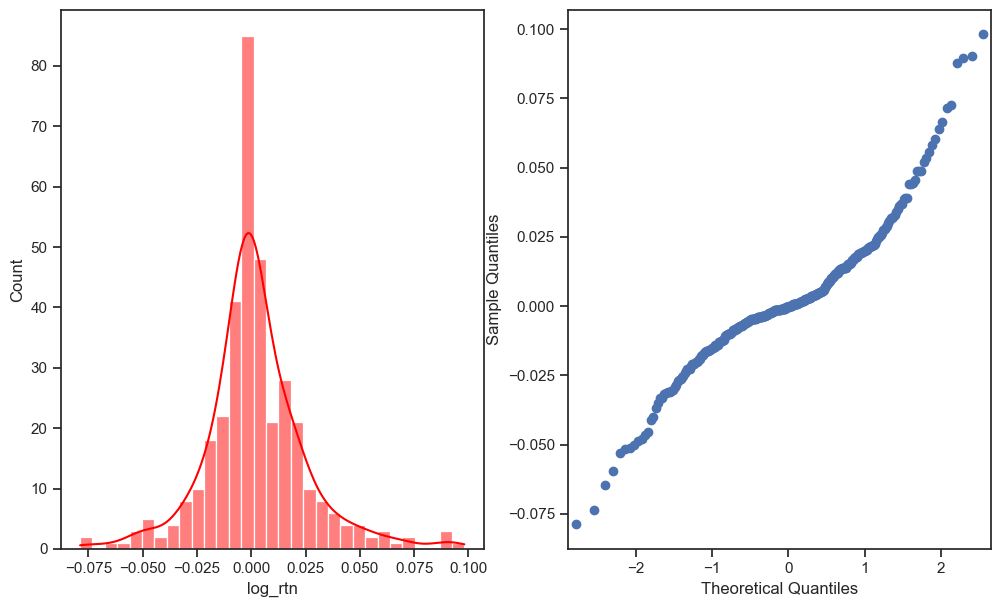

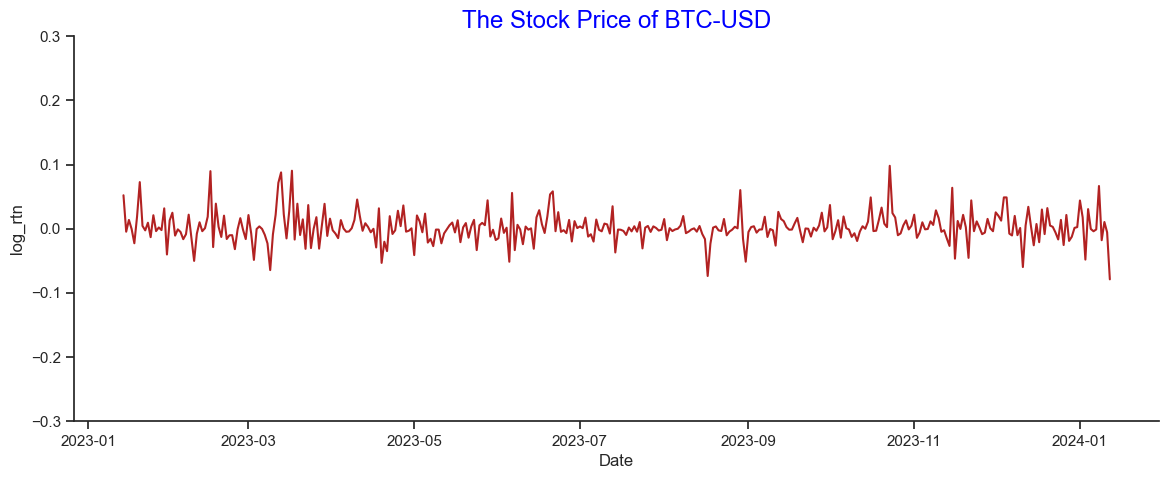

In [206]:
import numpy as np
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))


fig, ax = plt.subplots(1, 2, figsize=(12, 7)) 
sns.histplot(df["log_rtn"],kde=True, color ='red',ax=ax[0])
sm.ProbPlot(df["log_rtn"]).qqplot(line='s',color='blue',ax=ax[1])



plt.figure(figsize=(14,5))
sns.set_style("ticks")
p = sns.lineplot(data=df,x="Date",y='log_rtn',color='firebrick')
sns.despine()
plt.title(f"The Stock Price of {stock_ticker}",size='x-large',color='blue')
p.axes.set_ylim(-0.30,0.30)

#### Inflation Adjustments


Inflation calculation 

${R{r}}^{t} = \frac{1+R{t}}{1+\pi{t}} - 1$


${R{r}}^{t}$ = inflation adjusted returns

$R{t}$ = simple returns over t period

$\pi{t}$ = inflation rate



Through one of the formula which made sense to me was from [here](https://timeseriesreasoning.com/contents/inflation-adjustment/)

${Inflation\ Adjusted\ Value} = \frac{Current\ Value\ of\ the\ Asset}{Inflation\ Index\ Value} \times 100$


Another example of movie budget got from this [blog](https://medium.com/analytics-vidhya/adjusting-for-inflation-when-analysing-historical-data-with-python-9d69a8dcbc27)


${Inflation\ Adjusted\ Todays\ Value\ for\ Old\ asset} = \frac{Old\ Asset\ Value\ \  \times \ \ Todays\ Inflation\ Percentage} {Old\ Inflation\ Percentage}$ 

In [319]:
# Fetch inflation data

import pyfredapi as fred
import pandas as pd


# load various credentials in env variables
from dotenv import load_dotenv
load_dotenv()



cpi_sc = fred.SeriesCollection(series_id=["USACPALTT01CTGYM"])
f_cpi = cpi_sc.USACPALTT01CTGYM.df.tail(120).rename(columns={'USACPALTT01CTGYM':'inflation_rate'})

# reindex on the date
df2 = f_cpi.set_index('date')
df2['yyyymm'] = df2.index.strftime('%Y%m')
df2

Requesting series USACPALTT01CTGYM...


,inflation_rate,yyyymm
date,,
2013-11-01,1.206673,201311
2013-12-01,1.500705,201312
2014-01-01,1.579049,201401
2014-02-01,1.104570,201402
2014-03-01,1.498215,201403
...,...,...
2023-06-01,2.971588,202306
2023-07-01,3.160709,202307
2023-08-01,3.696583,202308


In [316]:
# Sample data monthly 

df1 = df.simple_rtn.resample("M").last()
df1.dropna()


df1 = df1.to_frame(name="simple_rtn")
df1['yyyymm'] = df1.index.strftime('%Y%m')
df1

,simple_rtn,yyyymm
Date,,
2023-01-31,0.013097,202301
2023-02-28,-0.015964,202302
2023-03-31,0.015871,202303
2023-04-30,0.000695,202304
2023-05-31,-0.017424,202305
2023-06-30,0.001048,202306
2023-07-31,-0.001544,202307
2023-08-31,-0.050034,202308
2023-09-30,0.002088,202309


In [321]:
# take a splice based on the date range
slice_df2 = df2.loc['2023-01-01':'2023-10-31']
slice_df1 = df1.loc['2023-01-01':'2023-10-31']

joined_df = pd.merge(slice_df1,slice_df2,on='yyyymm',how='outer')
joined_df['inflation_adj'] = ((1+joined_df['simple_rtn'])/(1+(joined_df['inflation_rate']/100)))-1
joined_df

# This joined DF is useless, keeping it here to know the PD related syntax

,simple_rtn,yyyymm,inflation_rate,inflation_adj
0,0.013097,202301,6.331667,-0.047229
1,-0.015964,202302,5.904450,-0.070827
2,0.015871,202303,4.853455,-0.031152
3,0.000695,202304,4.872060,-0.045795
4,-0.017424,202305,3.993678,-0.055158
5,0.001048,202306,2.971588,-0.027841
6,-0.001544,202307,3.160709,-0.032135
7,-0.050034,202308,3.696583,-0.083899
8,0.002088,202309,3.650365,-0.033203
9,0.004794,202310,3.214305,-0.026497


In [325]:
# fetching CPI index
cpi_sc = fred.SeriesCollection(series_id=["CPIAUCSL"])
f_cpi = cpi_sc.CPIAUCSL.df.tail(120).rename(columns={'CPIAUCSL':'cpi_index'})
f_cpi

Requesting series CPIAUCSL...


,date,cpi_index
804,2014-01-01,235.288
805,2014-02-01,235.547
806,2014-03-01,236.028
807,2014-04-01,236.468
808,2014-05-01,236.918
...,...,...
919,2023-08-01,306.269
920,2023-09-01,307.481
921,2023-10-01,307.619
922,2023-11-01,307.917


Inventually I am coming to conclusion that it will be much easier to calculate using google spreadsheet. Here is the excerpt from [investopedia](https://www.investopedia.com/terms/i/inflation_adjusted_return.asp)


The first step is to calculate the investment's return using the following formula:
```
Return = (Ending price - Beginning price + Dividends) / (Beginning price)
       = ($90,000 - $75,000 + $2,500) / $75,000 
       = 23.3% percent.
```
The second step is to calculate the level of inflation over the period using the following formula:
```
Inflation = (Ending CPI level - Beginning CPI level) / Beginning CPI level 
          = (721 - 700) / 700 
          = 3 percent
```
The third step is to geometrically back out the inflation amount using the following formula:
```
Inflation-adjusted return = (1 + Stock Return) / (1 + Inflation) - 1 
                          = (1.233 / 1.03) - 1 
                          = 19.7 percent
```

CPI data can be collcted from the FRED site and documented in google spreadsheet.




